In [1]:
%matplotlib notebook
import csv
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = loadmat('ex5data1.mat')
y = data['y']
x = data['X']
yval = data['yval']
xval = data['Xval']
ytest = data['ytest']
xtest = data['Xtest']
th = np.ones((2,1))
print(x.shape)
x = np.insert(x,0,np.ones(x.shape[0]),axis=1)
xval = np.insert(xval,0,np.ones(xval.shape[0]),axis=1)

(12, 1)


In [3]:
def coste(th,x,y,reg = 0):
    m = x.shape[0]
    return (1/(2*m)) * np.sum(np.square(np.dot(x,th) - y)) + (reg/(2*m)) * np.sum(np.square(th[1:])) 
coste(th,x,y)

303.9515255535976

In [4]:
def gradiente(th,x,y,reg=0):
    t0 = np.sum((np.ravel(np.dot(x, th)-y)) * x[:,0])/len(x)
    t1 = np.sum((np.dot(x, th)-y) * x[:,1:])/len(x) + reg * np.ravel(th[1:])/len(x)
    return np.append(t0,t1)
gradiente(th,x,y)

array([-15.30301567, 598.16741084])

In [5]:
def linearRegCostFunction(theta, X, y, reg):
    m = len(y)
    h = np.matmul(X, theta[:, None])

    tt = np.copy(theta)
    tt[0] = 0
    cost = (np.sum((h - y) ** 2)) / (2 * m) + (reg / (2 * m)) * np.sum(tt ** 2)
    gradients = (np.sum((h - y) * X, axis=0) / m) + (reg / m) * tt

    return (cost, gradients)

In [6]:
def trainLinearReg(X, y, reg):
    initial_theta = np.zeros(np.size(X, 1))
    res = opt.minimize(fun=linearRegCostFunction,x0=initial_theta,args=(X,y,reg),jac=True,method='TNC',options={'maxiter':400,'disp':True})
    return res.x

In [7]:
peso = trainLinearReg(x,y,0)

<IPython.core.display.Javascript object>


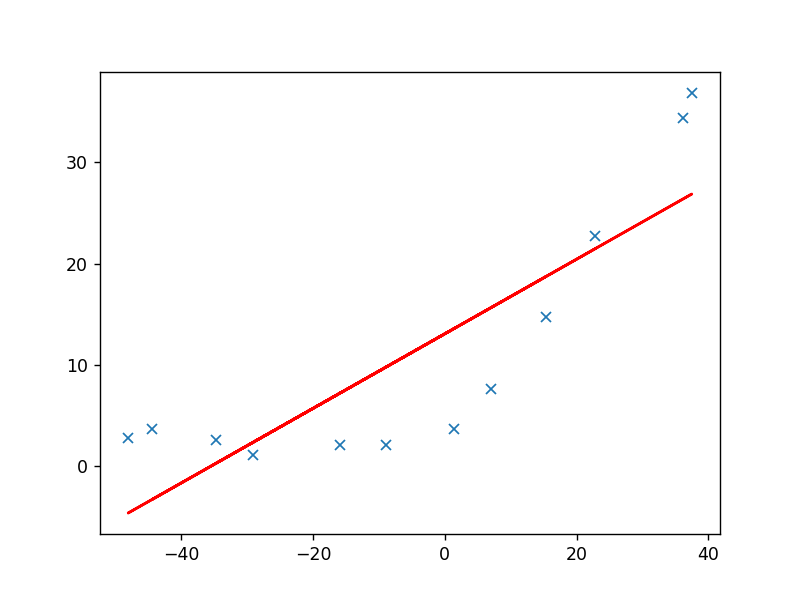

In [8]:
plt.figure()
plt.plot(x[:,1], y, 'x')
plt.plot(x[:,1],peso[0]+peso[1]*x[:,1],"r")


In [9]:
def curva_aprendizaje(x,y,xval,yval):
    pesos = []
    error = []
    val = []
    for i in range(len(x)):
        pesos.append(trainLinearReg(x[0:i+1],y[0:i+1],0))
        error.append(np.sum(np.square(np.dot(x[0:i+1],pesos[i]) - np.ravel(y[0:i+1])))/(2*(i+1)))
        val.append(np.sum(np.square(np.dot(xval,pesos[i]) - np.ravel(yval)))/(2*len(xval)))
    return error, val

<IPython.core.display.Javascript object>


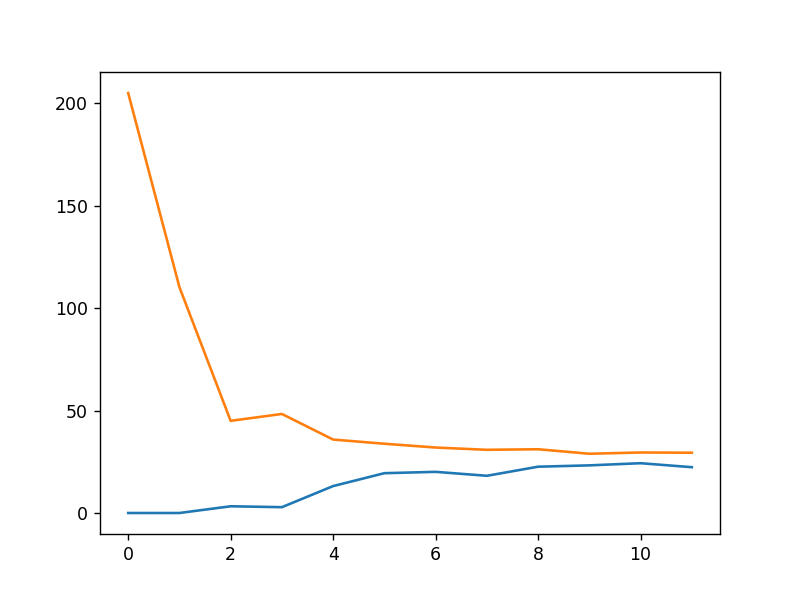

In [10]:
error, val = curva_aprendizaje(x,y,xval,yval)
plt.figure()
plt.plot(range(len(x)),error)
plt.plot(range(len(x)),val)

In [11]:
def new_data(X, p):
    data = np.copy(X)
    for i in range(p-1):
        data = np.insert(data, data.shape[1], X[:,0] ** (i+2), axis=1)        
    return data

In [12]:
def norm_new_data(X):
    media = np.empty([1, X.shape[1]])
    desv = np.empty([1, X.shape[1]])
    norm = np.copy(X)
    for i in range(X.shape[1]):
        media[0,i] = np.mean(X[:,i])
        desv[0,i] = np.std(X[:,i])
        norm[:,i] = (X[:,i] - media[0,i]) / desv[0,i]
    return norm, media, desv

In [13]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    normalized_X = (X - mu) / sigma

    return (normalized_X, mu, sigma)

In [14]:
#data = new_data(x[:,1].reshape((x.shape[0],1)), 8)
norm_data, media, desv = norm_new_data(new_data(x[:,1].reshape((x.shape[0],1)), 8))
norm_data = np.insert(norm_data, 0, np.ones(norm_data.shape[0]), axis=1)
peso_norm = trainLinearReg(norm_data,y,0)

In [15]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 5, max_x + 5, 0.05).reshape((-1, 1))
    x_poly = polyFeatures(x, p)
    x_poly = (x_poly - mu) / sigma
    x_poly = np.hstack((np.ones(len(x_poly)).reshape((-1, 1)), x_poly))
    #return x_poly

    plt.plot(x, np.matmul(x_poly, theta[:, None]), 'b-', linewidth=2)
#x_muestra = plotFit(min(x[:,1]), max(x[:,1]), media, desv, peso_norm, 8)

In [16]:
aux = np.arange(min(x[:,1])-5, max(x[:,1])+5, 0.05)
x_muestra = np.reshape(aux,(aux.shape[0],1))

norm_muestra = new_data(x_muestra, 8)
norm_muestra = (norm_muestra - media) / desv
norm_muestra = np.insert(norm_muestra, 0, np.ones(norm_muestra.shape[0]), axis=1)
y_muestra = np.dot(norm_muestra,peso_norm)

<IPython.core.display.Javascript object>


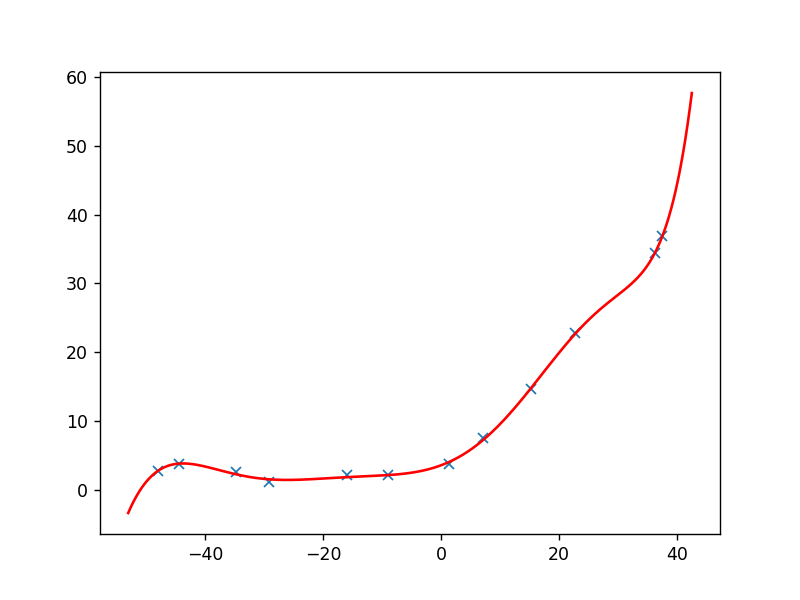

In [17]:
plt.figure()
plt.plot(x[:,1], y, 'x')
plt.plot(x_muestra, y_muestra,"r")

In [49]:
xval_norm_data = new_data(xval[:,1].reshape((xval.shape[0],1)), 8)
xval_norm_data = (xval_norm_data - media) / desv
xval_norm_data = np.insert(xval_norm_data, 0, np.ones(xval_norm_data.shape[0]), axis=1)

In [50]:
pesos = []
error = []
val = []

for i in range(norm_data.shape[0]):
    pesos.append(trainLinearReg(norm_data[0:i+1],y[0:i+1],0))    
    error.append(np.sum(np.square(np.dot(norm_data[0:i+1],pesos[i]) - np.ravel(y[0:i+1])))/(2*(i+1)))
    val.append(np.sum(np.square(np.dot(xval_norm_data,pesos[i]) - np.ravel(yval)))/(2*xval_norm_data.shape[0]))


<IPython.core.display.Javascript object>


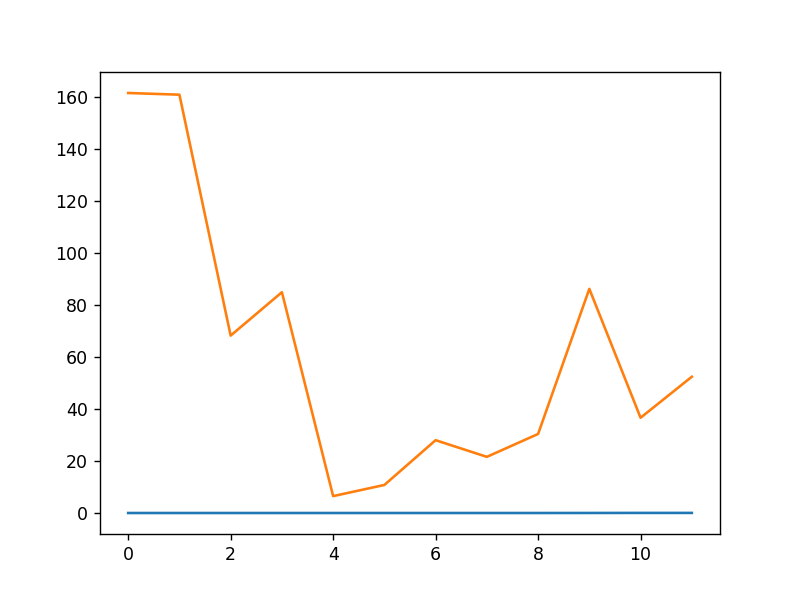

In [51]:
plt.figure()
plt.plot(range(len(x)),error)
plt.plot(range(len(x)),val)

In [53]:
delta = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
pesos = []
error = []
val = []
for i in range(len(delta)):
    pesos.append(trainLinearReg(norm_data,y,delta[i]))
    error.append(np.sum(np.square(np.dot(norm_data,pesos[i]) - np.ravel(y)))/(2*norm_data.shape[0]))
    val.append(np.sum(np.square(np.dot(xval_norm_data,pesos[i]) - np.ravel(yval)))/(2*xval_norm_data.shape[0]))

<IPython.core.display.Javascript object>


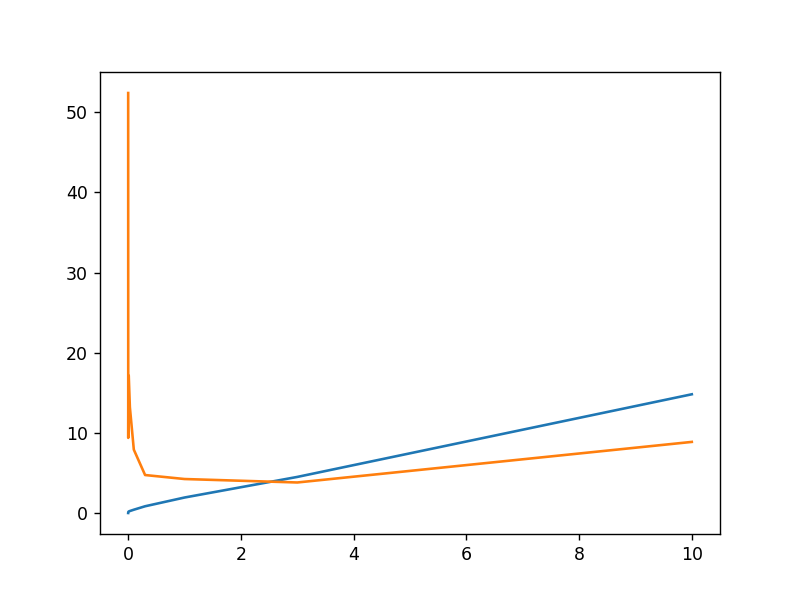

In [54]:
plt.figure()
plt.plot(delta,error)
plt.plot(delta,val)

In [68]:
xtest_norm_data = new_data(xtest, 8)
xtest_norm_data = (xtest_norm_data - media) / desv
xtest_norm_data = np.insert(xtest_norm_data, 0, np.ones(xtest_norm_data.shape[0]), axis=1)

In [69]:
peso_xtest = trainLinearReg(xtest_norm_data, ytest, 3)
error = np.sum(np.square(np.dot(xtest_norm_data, peso_xtest) - np.ravel(ytest)))/(2 * xtest_norm_data.shape[0])
error

2.393416753864283

In [64]:
xtest_norm_data.shape

(21, 8)